## Looking at all tanks from 22MT - 20 tonne Capacity 

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
tanks = [2202, 2203, 2204]  # List of tank IDs you want to query
ProductionTanks_df = ProductionTank.query('Tank_1 in @tanks')
#print(ProductionTanks_df)

      Material    BATCHID  Tank_1             Instruction_Step   INGRED_ID  \
2001   1397022  107956670    2202         S3_BATCH_IN_PROGRESS         NaN   
2002   1397022  107956670    2202                   STEP1_CONS     1002565   
2003   1397022  107956670    2202  PLEASE VERIFY BULK ADDITION         NaN   
2004   1397022  107956670    2202                   STEP1_CONS     1037802   
2005   1397022  107956670    2202                   STEP1_CONS     1002818   
...        ...        ...     ...                          ...         ...   
7818   1775253  108051514    2203                   STEP2_CONS  U_86MT15_1   
7819   1775253  108051514    2203              STEP2_AGITATION         NaN   
7820   1775253  108051514    2203            WEIGHT_VALIDATION         NaN   
7821   1775253  108051514    2203              STEP3_AGITATION         NaN   
7822   1775253  108051514    2203                           HP         NaN   

                               INGRED_Name   Quantity       Pha

In [6]:

# Group by 'Batch' and extract the 'Quantity' for the 'HP' instruction step
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

#print(hp_quantities)

In [7]:
# Extracting the 'Quantity' for the 'HP' instruction step for each 'BATCHID'
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

# Aggregating data per tank
aggregated_ProductionTank22_df1 = ProductionTanks_df.groupby(['BATCHID','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay': 'sum',
    #'Quantity': 'sum',
    'Flowrate_KGMIN': 'mean',
    'Target_Phase_duration': 'mean',
    'Target_Flowrate': 'mean'
}).reset_index()

# Merging the aggregated data with the HP quantities
aggregated_ProductionTank22_df1 = aggregated_ProductionTank22_df1.merge(hp_quantities, on='BATCHID', how='left', suffixes=('', '_from_HP'))

# Print the resulting DataFrame
print(aggregated_ProductionTank22_df1)

      BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868    2202             806           94.0                 21   
1   107848868    2204             879          640.0               2519   
2   107862335    2204             530          210.0               5231   
3   107867810    2202            1098          884.0               2146   
4   107867810    2203             182           25.0                 24   
..        ...     ...             ...            ...                ...   
68  108073632    2202             873          667.0               4254   
69  108075449    2204            1001          724.0               2088   
70  108084749    2203             231            9.0                  2   
71  108084749    2204             443          187.0               5291   
72  108084750    2202             204           11.0                  3   

    Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0        17.726500         

In [8]:
####Aggregate data per tank
aggregated_ProductionTank22_df2=ProductionTanks_df.groupby(['BATCHID','Material','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
   'Phase_start_delay':'sum',
   'Quantity':'sum',
   'Flowrate_KGMIN':'mean',
   'Target_Phase_duration':'mean',
   'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank22_df2)

## EDA on Tanks 22MT 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Just looks at batchid details produced in tank 22MT
df = pd.DataFrame(aggregated_ProductionTank22_df1)
# Just looks at batchid and materials details produced in tank 22MT
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

In [11]:
#df2

In [12]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels


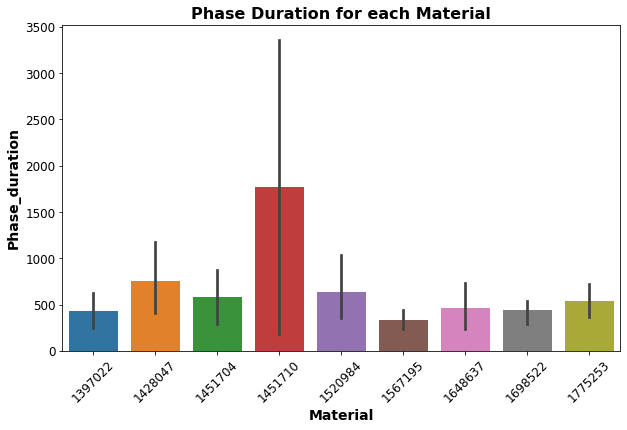

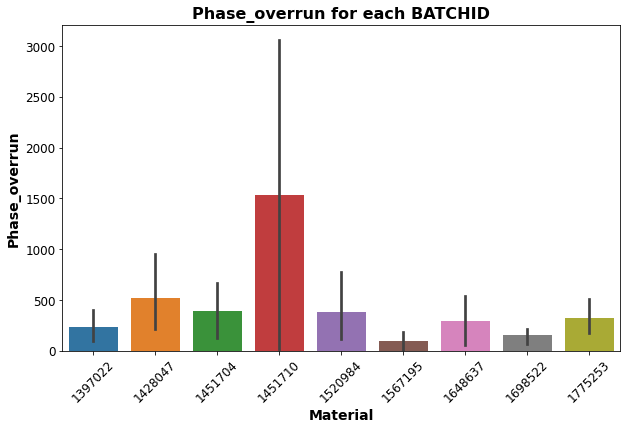

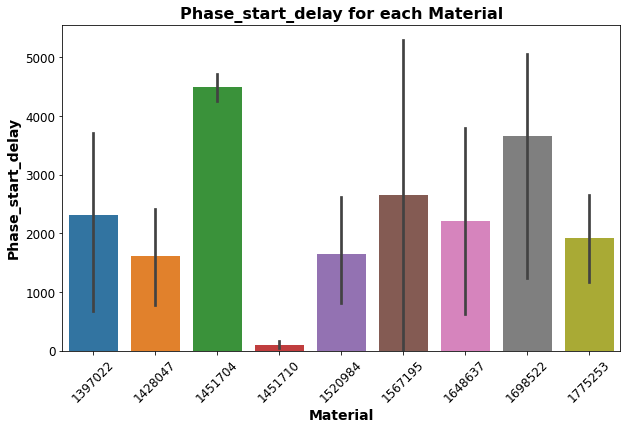

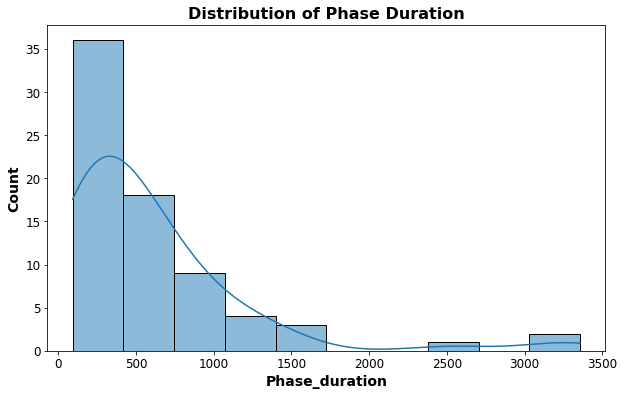

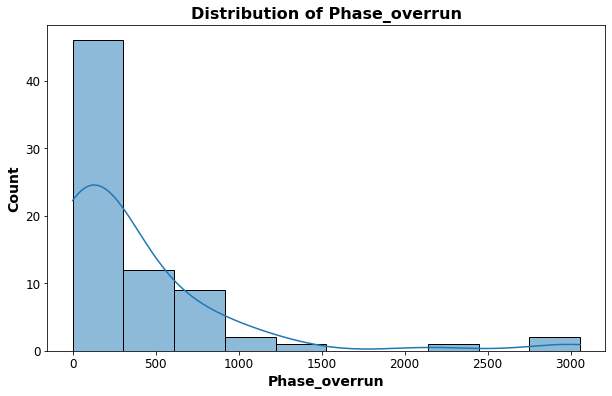

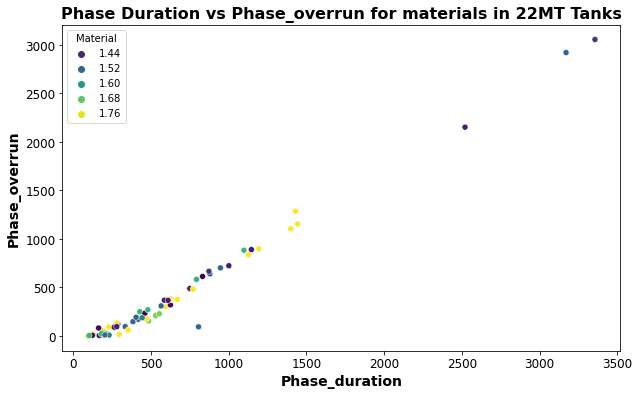

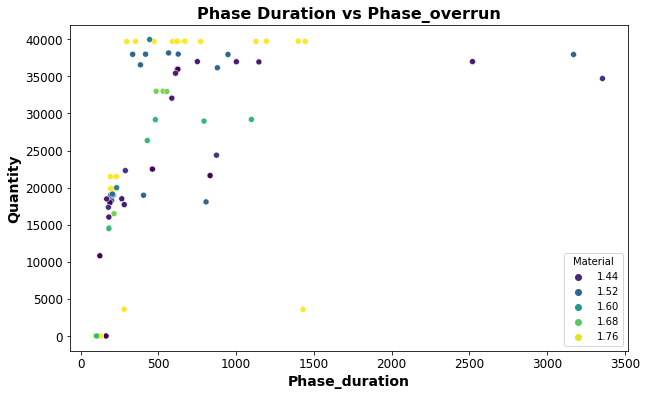

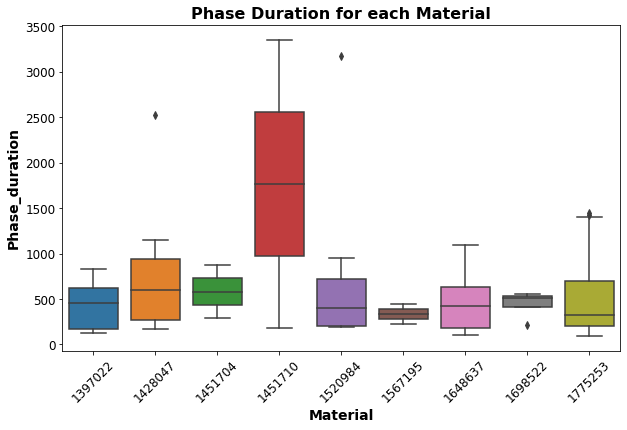

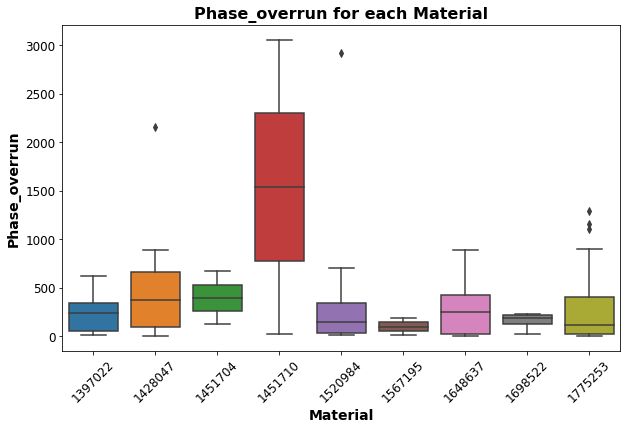

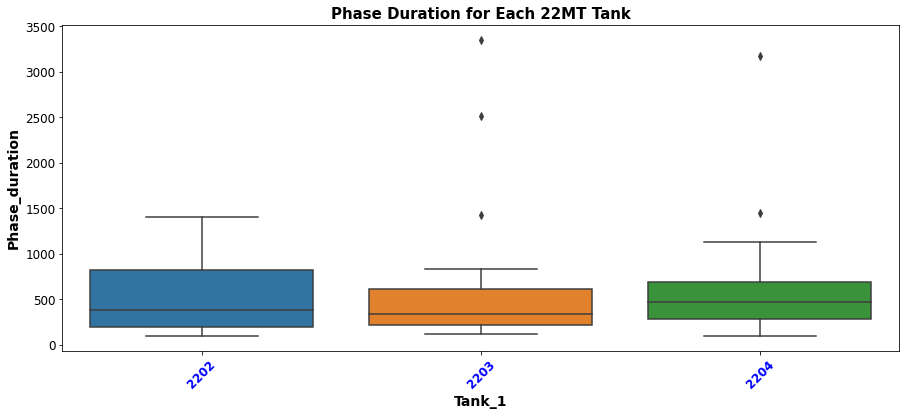

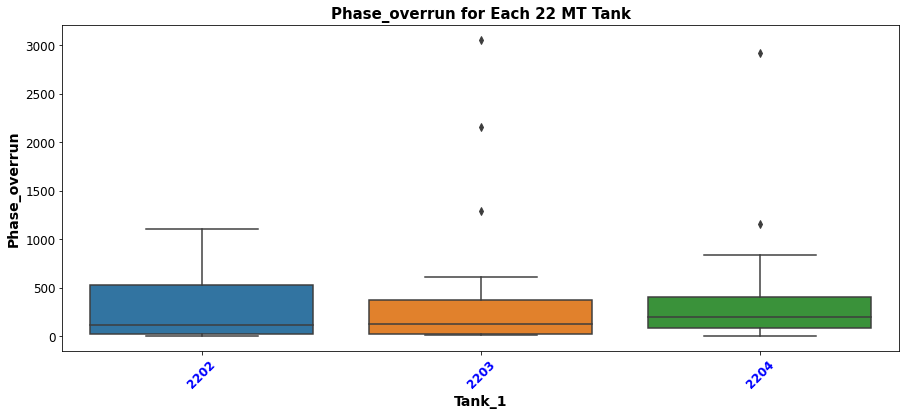

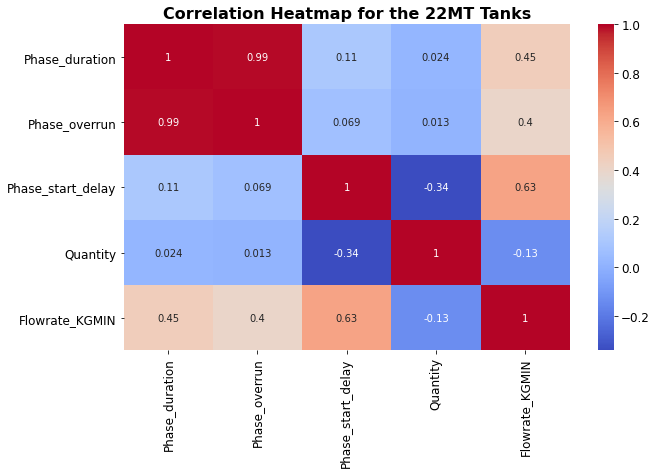

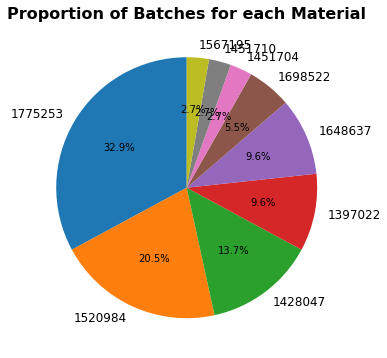

,BATCHID,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate,Quantity
count,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,67.000000,70.000000
mean,1.079874e+08,2203.000000,594.972603,371.684932,2026.849315,63.646040,23.235994,228.935807,28611.719200
std,6.397467e+04,0.816497,615.813260,584.612594,1954.713326,35.450276,15.595670,69.405964,9629.470801
min,1.078489e+08,2202.000000,93.000000,0.000000,2.000000,0.000000,11.100000,131.960800,11151.564000
25%,1.079567e+08,2202.000000,205.000000,25.000000,9.000000,36.774540,15.588235,188.249709,19857.794750
50%,1.079933e+08,2203.000000,428.000000,172.000000,2186.000000,68.392188,17.411765,237.850400,32062.170000
75%,1.080336e+08,2204.000000,750.000000,380.000000,3602.000000,92.402843,25.111111,247.907363,37713.667000
max,1.080848e+08,2204.000000,3356.000000,3057.000000,5474.000000,127.688275,121.500000,547.500000,39978.798000


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(aggregated_ProductionTank22_df1)
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each BATCHID')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_overrun
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun for materials in 22MT Tanks')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_start_delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Quantity', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun')
plt.show()

# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_Phase_duration grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_duration', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase Duration for Each 22MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 4. Box Plot - Phase_overrun grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_overrun', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase_overrun for Each 22 MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 5. Heatmap - Correlation heatmap
correlation_matrix = df[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for the 22MT Tanks')
plt.show()

# 6. Pie Chart - Proportion of batches for each Material
material_counts = df2['Material'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

#7 Descriptive Statistics 

aggregated_ProductionTank22_df1.describe()


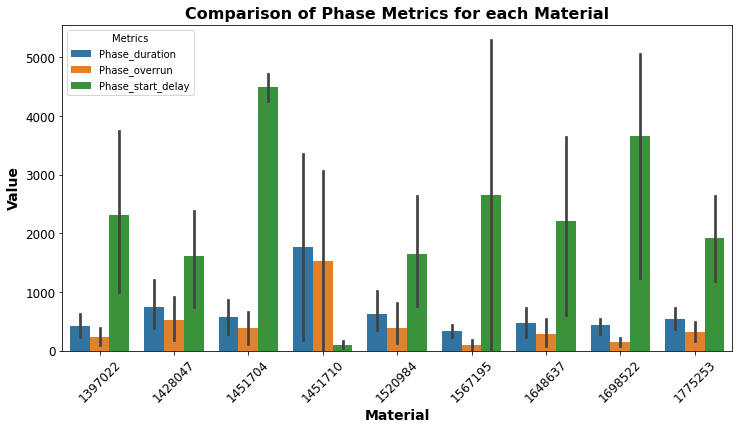

In [14]:
df = pd.DataFrame(aggregated_ProductionTank22_df2)

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Material', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Phase Metrics for each Material')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [15]:
## Examining the differences in production of materials that are common between all 22MT tanks

In [16]:
tanks_in_group1 = ['2202', '2203', '2204']
common_materials = aggregated_ProductionTank22_df2.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [17]:
filtered_data = aggregated_ProductionTank22_df2[aggregated_ProductionTank22_df2['Material'].isin(common_materials)]

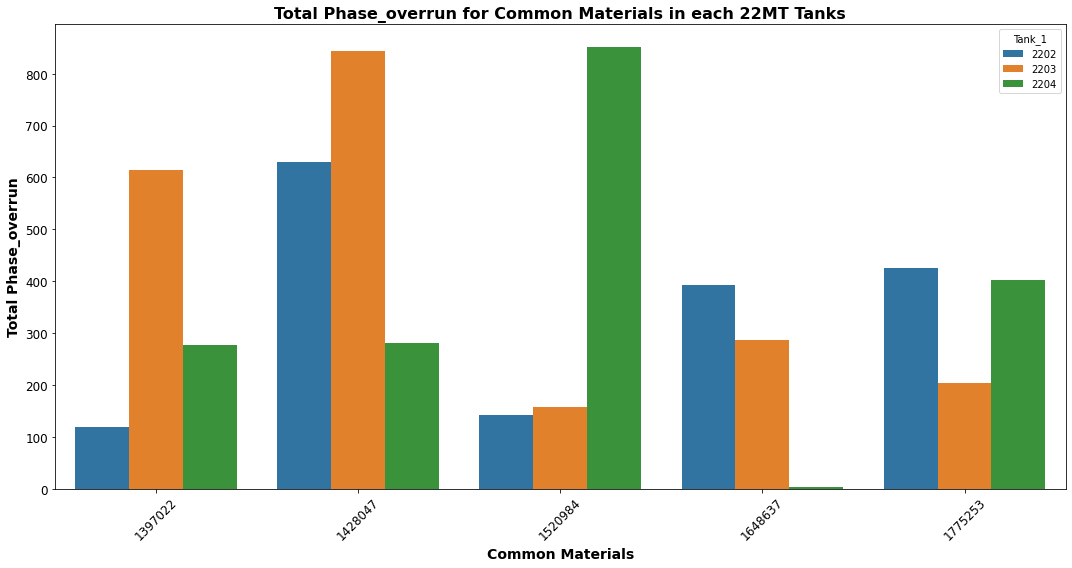

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Total Phase_overrun for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_overrun')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

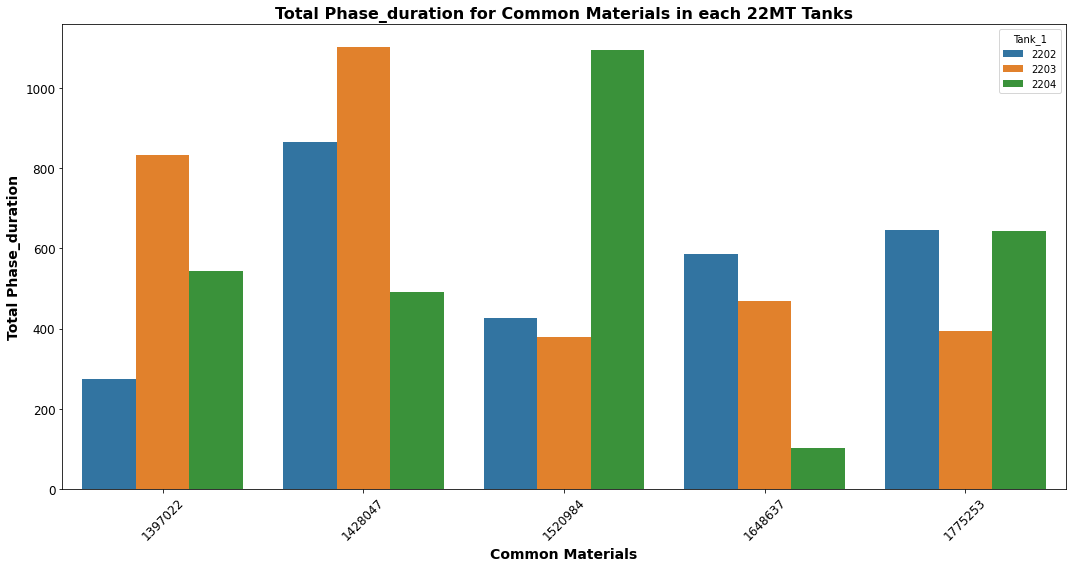

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Total Phase_duration for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_duration')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

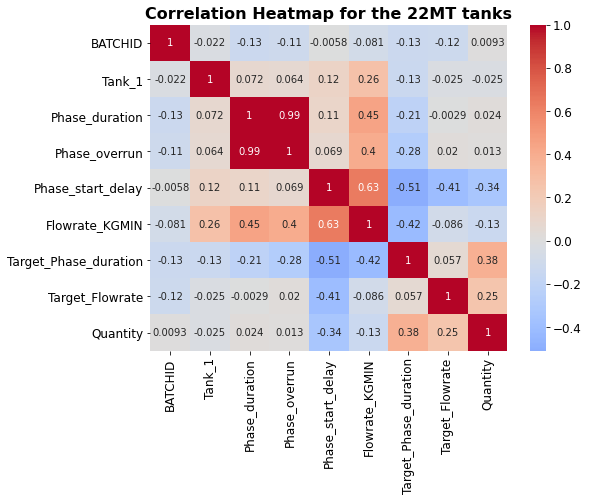

In [20]:
correlation_matrix = aggregated_ProductionTank22_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for the 22MT tanks")
plt.show()

In [21]:
# Handling missing values
#aggregated_ProductionTank22_df1.dropna(inplace=True)  # Remove rows with missing values

In [22]:
# Determine the number of missing values for each column
print(aggregated_ProductionTank22_df1.isna().sum())

# Replace missing values with zeros for the entire DataFrame
aggregated_ProductionTank22_df1.fillna(0, inplace=True)

BATCHID                  0
Tank_1                   0
Phase_duration           0
Phase_overrun            0
Phase_start_delay        0
Flowrate_KGMIN           0
Target_Phase_duration    0
Target_Flowrate          6
Quantity                 3
dtype: int64


In [23]:
# Handling duplicates
duplicates = aggregated_ProductionTank22_df1[aggregated_ProductionTank22_df1.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [BATCHID, Tank_1, Phase_duration, Phase_overrun, Phase_start_delay, Flowrate_KGMIN, Target_Phase_duration, Target_Flowrate, Quantity]
Index: []


In [24]:
# Handling duplicates
aggregated_ProductionTank22_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [25]:
# Define columns where you want to detect and remove outliers
ProductionTank22_df2 = pd.DataFrame(aggregated_ProductionTank22_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank22_df2 = remove_outliers_iqr(ProductionTank22_df2, col)

# Display the cleaned DataFrame
#print(ProductionTank22_df2)

      BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
1   107848868    2204             879          640.0               2519   
2   107862335    2204             530          210.0               5231   
3   107867810    2202            1098          884.0               2146   
4   107867810    2203             182           25.0                 24   
6   107887071    2203             287          124.0               4720   
7   107899925    2203             222           25.0                  4   
10  107899926    2203             209            9.0                  5   
11  107907563    2204             750          489.0               2346   
12  107915806    2204             485          156.0               4886   
13  107925352    2203             211           30.0                  2   
14  107925352    2204             417          172.0               4110   
15  107933869    2203             428          250.0               4395   
18  107956670    2202    

In [26]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank22_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank22_df2.describe())

Original DataFrame Summary Statistics:
            BATCHID       Tank_1  Phase_duration  Phase_overrun  \
count  7.300000e+01    73.000000       73.000000      73.000000   
mean   1.079874e+08  2203.000000      594.972603     371.684932   
std    6.397467e+04     0.816497      615.813260     584.612594   
min    1.078489e+08  2202.000000       93.000000       0.000000   
25%    1.079567e+08  2202.000000      205.000000      25.000000   
50%    1.079933e+08  2203.000000      428.000000     172.000000   
75%    1.080336e+08  2204.000000      750.000000     380.000000   
max    1.080848e+08  2204.000000     3356.000000    3057.000000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          73.000000       73.000000              73.000000   
mean         2026.849315       63.646040              23.235994   
std          1954.713326       35.450276              15.595670   
min             2.000000        0.000000              11.100000   
25%             9.0000

In [27]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
aggregated_ProductionTank22_df1[numerical_cols] = scaler.fit_transform(aggregated_ProductionTank22_df1[numerical_cols])
print(aggregated_ProductionTank22_df1.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107848868    2202        0.345052      -0.478277          -1.033262   
1  107848868    2204        0.464415       0.462138           0.253519   
2  107862335    2204       -0.106237      -0.278482           1.650536   
3  107867810    2202        0.822504       0.882397           0.061377   
4  107867810    2203       -0.675254      -0.597120          -1.031717   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
0       -1.304287             121.500000       237.850400  0.796899  
1        1.190189              16.266667       302.778350  0.796899  
2        0.520349              19.176471       152.181450 -0.998910  
3        0.760500              11.150000       177.123836  0.161158  
4       -1.419487              17.583333       229.221200  0.161158  


In [28]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
ProductionTank22_df2[numerical_cols] = scaler.fit_transform(ProductionTank22_df2[numerical_cols])
print(ProductionTank22_df2.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
1  107848868    2204        1.372806       1.463322           0.070062   
2  107862335    2204        0.171367      -0.175945           1.461980   
3  107867810    2202        2.126717       2.393510          -0.121378   
4  107867810    2203       -1.026629      -0.881211          -1.210482   
6  107887071    2203       -0.665164      -0.503798           1.199712   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
1        1.195633              16.266667       302.778350  0.776775  
2        0.422082              19.176471       152.181450 -1.286111  
3        0.699415              11.150000       177.123836  0.046486  
4       -1.818100              17.583333       229.221200  0.046486  
6        0.696206              11.437500       226.111543 -1.846945  


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.018612    |  0.0110014 | 0.981652   |  0.988334  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.0194394   |  0.0131029 | 0.980836   |  0.986106  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 1.00581     |  0.96017   | 0.00844994 | -0.0181557 |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.00405625  |  0.0116385 | 0.996001   |  0.987659  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra

In [30]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

results = []


# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
    
     # Append results to a list
    results.append({
        'Model': model_name,
        'Mean MSE': mean_mse,
        'Std MSE': std_mse
    })

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Save the results to an Excel file
df.to_excel("22MTmodel_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   

LinearRegression:
  Mean MSE: 0.022300
  Std MSE: 0.009711

Ridge:
  Mean MSE: 0.023925
  Std MSE: 0.010992

Lasso:
  Mean MSE: 1.106815
  Std MSE: 0.404562

RandomForestRegressor:
  Mean MSE: 0.022365
  Std MSE: 0.010269

GradientBoostingRegressor:
  Mean MSE: 0.024455
  Std MSE: 0.007460

MLPRegressor:
  Mean MSE: 1970005358482.344971
  Std MSE: 3876428951404.315918

DecisionTreeRegressor:
  Mean MSE: 0.028105
  Std MSE: 0.010693

AdaBoostRegressor:
  Mean MSE: 0.025240
  Std MSE: 0.008268

BaggingRegressor:
  Mean MSE: 0.022883
  Std MSE: 0.008710



In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
ada_pred_train = best_ada.predict(X_train)
ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22 TUN results.xlsx', index=False)

Best parameters for Ridge Regression: {'alpha': 0.1}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 200}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best parameters for Decision Tree Regressor: {'max_depth': 20}
Best parameters for Bagging Regressor: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

k-fold cross-validator

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('kfold_results.xlsx', index=False)

model with principal components

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# List of regression models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
]

# Apply PCR to each model
for model in models:
    model_name = model.__class__.__name__

    # Apply PCA to reduce dimensionality
    num_components = 5  # You can choose the number of principal components
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the model with principal components
    model.fit(X_train_pca, y_train)
    pred_train = model.predict(X_train_pca)
    pred_test = model.predict(X_test_pca)
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)

    # Store results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Train MSE': train_mse,
                                    'Test MSE': test_mse, 'Train R2': train_r2, 'Test R2': test_r2},
                                   ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('pcr_results.xlsx', index=False)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor  # Import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# List of regression models including MLPRegressor
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # Neural Network
]

# Apply PCR to each model
for model in models:
    model_name = model.__class__.__name__

    # Apply PCA to reduce dimensionality
    num_components = 5  # You can choose the number of principal components
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the model with principal components
    if model_name == 'MLPRegressor':
        # For the neural network, use the original features instead of principal components
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
    else:
        model.fit(X_train_pca, y_train)
        pred_train = model.predict(X_train_pca)
        pred_test = model.predict(X_test_pca)

    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)

    # Store results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Train MSE': train_mse,
                                    'Test MSE': test_mse, 'Train R2': train_r2, 'Test R2': test_r2},
                                   ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('pcr_nn_results.xlsx', index=False)

+----+---------------------------+-------------+-------------+--------------+--------------+
|    | Model                     |   Train MSE |    Test MSE |     Train R2 |      Test R2 |
+====+===========================+=============+=============+==============+==============+
|  0 | LinearRegression          | 0.376081    | 0.40254     |  0.629249    |  0.57315     |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  1 | Ridge                     | 0.376247    | 0.404107    |  0.629085    |  0.571488    |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  2 | Lasso                     | 0.621828    | 0.735959    |  0.386986    |  0.219595    |
+----+---------------------------+-------------+-------------+--------------+--------------+
|  3 | RandomForestRegressor     | 0.0545318   | 0.691923    |  0.946241    |  0.266291    |
+----+---------------------------+-------------+-------------+--------

KNeighborsRegressor/SVR

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(ProductionTank22_df2)

X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results_hyper_tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |   0.196995  |   0.245245 |   0.805797 |  0.739945 |      0.305657 |     0.130697 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |   0.0249955 |   0.18618  |   0.975359 |  0.802577 |      0.176436 |     0.101354 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('Simple Neural Network.xlsx', index=False)

from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


results_df.to_excel('22MTLSTMSNN Neural Network.xlsx', index=False)


1/1 [==============================] - 0s 31ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |  0.00910814 |  0.0546485 |   0.991021 |  0.942051 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 28ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |  0.00910814 |  0.0546485 |   0.991021 |  0.942051 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |  0.245905   |  0.369895  |   0.7575

simple_nn_model - TUNED

In [50]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 16, 'dense1_neurons': 64, 'dense2_neurons': 64, 'epochs': 50}
Training MSE: 0.0024664192028306837
Training R^2: 0.9975685379097319
Test MSE: 0.0294100930658293
Test R^2: 0.9688138030512361


In [ ]:
lstm- tuned

In [51]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 16, 'epochs': 100, 'lstm_neurons': 70}
Training MSE for LSTM: 0.011636836726764724
Training R^2 for LSTM: 0.9885280947702262
Test MSE for LSTM: 0.07506899716189457
Test R^2 for LSTM: 0.9203975137039905


In [41]:
#!pip install -U keras-tuner
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for Simple Neural Network
def create_simple_nn(neurons_layer1=64, neurons_layer2=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simple_nn_param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

simple_nn_model = KerasRegressor(build_fn=create_simple_nn, verbose=0)
simple_nn_search = RandomizedSearchCV(estimator=simple_nn_model, param_distributions=simple_nn_param_grid, n_iter=5, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display results for Simple NN
simple_nn_results = pd.DataFrame(simple_nn_search_result.cv_results_)[['param_neurons_layer1', 'param_neurons_layer2', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(simple_nn_results, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
simple_nn_results.to_excel('simple_nn.xlsx', index=False)
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Define hyperparameters grid for LSTM
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid, n_iter=5, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Display results for LSTM
lstm_results = pd.DataFrame(lstm_search_result.cv_results_)[['param_lstm_neurons', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(lstm_results, headers='keys', tablefmt='grid'))
print("Best LSTM Params:", lstm_search_result.best_params_)
# Save results DataFrame to an Excel file
lstm_results.to_excel('LSTM_results.xlsx', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|    |   param_neurons_layer1 |   param_neurons_layer2 |   param_batch_size |   param_epochs |   mean_test_score |   std_test_score |   rank_test_score |
+====+========================+========================+====================+================+===================+==================+===================+
|  0 |                     64 |                     32 |                 16 |             30 |         -0.368896 |         0.223271 |                 3 |
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|  1 |                    128 |                     16 |                 32 |            100 |         -0.338163 |         0.110882 |                 1 |
+----+----------

'Model': 'Dense Neural Network 

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_start_delay'], axis=1)
y = df['Phase_start_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('neural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)



results_df.to_excel('22MTdenseNN_results.xlsx', index=False)

1/1 [==============================] - 0s 36ms/step
+----+----------------------+-------------+------------+------------+-----------+
|    | Model                |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+======================+=============+============+============+===========+
|  0 | Dense Neural Network |   0.0161272 |    0.48031 |   0.982929 |  0.605211 |
+----+----------------------+-------------+------------+------------+-----------+
Best Score:  -0.29134610295295715
Best Params:  {'neurons_layer3': 16, 'neurons_layer2': 32, 'neurons_layer1': 256, 'epochs': 50, 'batch_size': 16}
1/1 [==============================] - 0s 28ms/step


In [ ]:
can you add LSTM to the table of models above please
